In [5]:
'''
Creates plots for a grid search experiment (#28) done for torque curriculums

Requires the experiments to be available and evaluated in "torque/orig" and "torque/curr" directories.
'''

import pandas as pd
import numpy as np
import math
import glob
import csv
import re
import os

import matplotlib.pyplot as plt

In [40]:
files = glob.glob("../runs/2019_06_*240hz*/1/progress.csv")

In [41]:
def read_data(path):
    return pd.read_csv(path)

In [101]:
data = [read_data(f) for f in files]

legends = [re.findall("1.5-([^/]*)\/", path)[0] for path in files]
xs = [d["TotalStep"] for d in data]
ys = [d["RewardAverage"] for d in data]

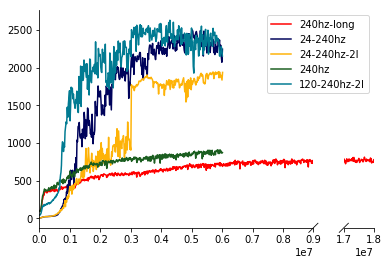

In [118]:
"""
Broken axis example, where the x-axis will have a portion cut out.
"""
from brokenaxes import brokenaxes

colors = ["#ff0000","#00035b","#feb308","#1B5E20","#017b92","#a2cffe","#ff028d",]
maxy = max([np.max(y) for y in ys]) * 1.02

fig = plt.figure()
bax = brokenaxes(xlims=((0, 9e6), (17e6, 18e6)), hspace=.05)


# plot the same data on both axes
for x, y, l, c in zip(xs, ys, legends, colors):
    bax.plot(x, y, "-", color=c, label=l)

bax.axs[1].legend()

plt.show()